In [1]:
#importing the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the csv files
gst_train_in=pd.read_csv('../../GSTN_project/Train_60/Train_60/X_Train_Data_Input.csv')
gst_train_out=pd.read_csv('../../GSTN_project/Train_60/Train_60/Y_Train_Data_Target.csv')
gst_train=pd.concat([gst_train_in,gst_train_out],axis=1)

In [3]:
gst_test_in=pd.read_csv('../../GSTN_project/Test_20/Test_20/X_Test_Data_Input.csv')
gst_test_out=pd.read_csv('../../GSTN_project/Test_20/Test_20/Y_Test_Data_Target.csv')
gst_test=pd.concat([gst_test_in,gst_test_out],axis=1)

In [4]:
gst_train.head()

ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column14  Column15  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...  0.001351   0.00339   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...  0.001351   0.00339   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...  0.001351   0.00339   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...       NaN   0.00339   
4 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...       NaN   0.00339   

   Column16  Column17  Column18  Column19  Column20  Column21  \
0       0.0         0       0.0         0         0         0   
1       0.0         0       0.0         0         0         0   
2       0.0         0       0.0         0         0         0   
3       0.0         0       1.0         0         0         0   
4       0.0         0       0.0         0         0         0   

                                 ID  target  
0  ad1a67e4cbddc767a3456b0d94299b9e       0  
1  7246d2f76ac0c217ec25e72ea5f014cb       0  
2  22ba388e7dd14c13342c49e75fc29dda       0  
3  59f9b981472d97342587fb3e6392aeb1       1  
4  f6317cf7ecf126859804eddff279aead       0  

[5 rows x 25 columns]

In [5]:
#removing the ID column
gst_train=gst_train.drop(columns='ID')
gst_test=gst_test.drop(columns='ID')

In [6]:
gst_train.info()#check for the type of values in each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   785124 non-null  float64
 1   Column1   785133 non-null  int64  
 2   Column2   785133 non-null  float64
 3   Column3   658830 non-null  float64
 4   Column4   657423 non-null  float64
 5   Column5   617953 non-null  float64
 6   Column6   781283 non-null  float64
 7   Column7   785133 non-null  float64
 8   Column8   781283 non-null  float64
 9   Column9   52996 non-null   float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column14  419430 non-null  float64
 15  Column15  768677 non-null  float64
 16  Column16  785133 non-null  float64
 17  Column17  785133 non-null  int64  
 18  Column18  785133 non-null  float64
 19  Column19  785133 non-null  int64  
 20  Colu

In [7]:
gst_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261712 entries, 0 to 261711
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   261710 non-null  float64
 1   Column1   261712 non-null  int64  
 2   Column2   261712 non-null  float64
 3   Column3   219478 non-null  float64
 4   Column4   219002 non-null  float64
 5   Column5   206053 non-null  float64
 6   Column6   260478 non-null  float64
 7   Column7   261712 non-null  float64
 8   Column8   260478 non-null  float64
 9   Column9   17859 non-null   float64
 10  Column10  261712 non-null  int64  
 11  Column11  261712 non-null  int64  
 12  Column12  261712 non-null  int64  
 13  Column13  261712 non-null  int64  
 14  Column14  140033 non-null  float64
 15  Column15  256227 non-null  float64
 16  Column16  261712 non-null  float64
 17  Column17  261712 non-null  int64  
 18  Column18  261712 non-null  float64
 19  Column19  261712 non-null  int64  
 20  Colu

In [8]:
gst_train=gst_train.drop(columns='Column9')#contains very less non null values
gst_test=gst_test.drop(columns='Column9')

In [9]:
#removing the rows in which Column6 has null values
gst_train=gst_train.dropna(subset='Column6')
gst_test=gst_test.dropna(subset='Column6')

In [10]:
gst_train.describe()

Column0        Column1        Column2        Column3  \
count  781275.000000  781283.000000  781283.000000  658830.000000   
mean        0.433920    1325.739978    2952.377017      -0.000210   
std         1.134486     905.976323    2142.544360       0.999935   
min         0.000000     -64.000000     -47.000000      -2.028572   
25%         0.000000     518.000000    1131.000000      -0.675216   
50%         0.000000    1177.000000    2711.000000       0.678139   
75%         0.000000    2436.000000    4474.000000       0.678139   
max        17.000000    2495.000000   10290.000000       0.678139   

             Column4        Column5        Column6        Column7  \
count  657423.000000  617953.000000  781283.000000  781283.000000   
mean       -0.000855      -0.000367      -0.000709      -0.002335   
std         1.000350       1.015255       0.998984       0.978298   
min        -1.855728      -0.007469      -0.407939      -0.015607   
25%        -0.577162      -0.007469      -0.407939      -0.015607   
50%         0.701403      -0.007469      -0.407939      -0.015607   
75%         0.701403      -0.007468      -0.367723      -0.015607   
max         0.701403     551.421127      14.985817     201.687947   

             Column8       Column10  ...       Column13       Column14  \
count  781283.000000  781283.000000  ...  781283.000000  419430.000000   
mean       -0.000158       0.241738  ...       0.329874      -0.000863   
std         1.056769       0.428137  ...       0.470167       1.291202   
min        -0.774979       0.000000  ...       0.000000    -832.749615   
25%        -0.774979       0.000000  ...       0.000000       0.001351   
50%         0.122085       0.000000  ...       0.000000       0.001351   
75%         0.625528       0.000000  ...       1.000000       0.001351   
max       323.992484       1.000000  ...       1.000000       8.514416   

            Column15       Column16       Column17       Column18  \
count  768673.000000  781283.000000  781283.000000  781283.000000   
mean       -0.000837       0.001212       0.270724       0.146459   
std         1.283396       0.034941       3.132835       0.428085   
min     -1091.545904       0.000000       0.000000       0.000000   
25%         0.003390       0.000000       0.000000       0.000000   
50%         0.003390       0.000000       0.000000       0.000000   
75%         0.003390       0.000000       0.000000       0.000000   
max         0.012736       2.000000     728.000000      12.000000   

            Column19       Column20       Column21         target  
count  781283.000000  781283.000000  781283.000000  781283.000000  
mean        0.018788       0.009397       0.002771       0.094089  
std         0.135777       0.096483       0.052568       0.291952  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 22 columns]

In [11]:
#we will use robust scaler as it is robust to outliers
from sklearn.preprocessing import RobustScaler

In [12]:
rs=RobustScaler()#creating a robust scaler object
gst_train[['Column1','Column2','Column5','Column7','Column14','Column15']]=rs.fit_transform(gst_train[['Column1','Column2','Column5','Column7','Column14','Column15']])#mean shifted to zero with standard deviation equals to 1


In [13]:
gst_test[['Column1','Column2','Column5','Column7','Column14','Column15']]=rs.transform(gst_test[['Column1','Column2','Column5','Column7','Column14','Column15']])

In [14]:
gst_train.describe()

Column0        Column1        Column2        Column3  \
count  781275.000000  781283.000000  781283.000000  658830.000000   
mean        0.433920       0.077550       0.072204      -0.000210   
std         1.134486       0.472355       0.640905       0.999935   
min         0.000000      -0.647028      -0.825007      -2.028572   
25%         0.000000      -0.343587      -0.472629      -0.675216   
50%         0.000000       0.000000       0.000000       0.678139   
75%         0.000000       0.656413       0.527371       0.678139   
max        17.000000       0.687174       2.267125       0.678139   

             Column4       Column5        Column6       Column7  \
count  657423.000000  6.179530e+05  781283.000000  7.812830e+05   
mean       -0.000855  9.255523e+03      -0.000709  5.311654e+04   
std         1.000350  1.323254e+06       0.998984  3.915029e+06   
min        -1.855728  0.000000e+00      -0.407939  0.000000e+00   
25%        -0.577162  0.000000e+00      -0.407939  0.000000e+00   
50%         0.701403  0.000000e+00      -0.407939  0.000000e+00   
75%         0.701403  1.000000e+00      -0.367723  1.000000e+00   
max         0.701403  7.187156e+08      14.985817  8.071932e+08   

             Column8       Column10  ...       Column13      Column14  \
count  781283.000000  781283.000000  ...  781283.000000  4.194300e+05   
mean       -0.000158       0.241738  ...       0.329874 -1.782362e+06   
std         1.056769       0.428137  ...       0.470167  1.039827e+09   
min        -0.774979       0.000000  ...       0.000000 -6.706285e+11   
25%        -0.774979       0.000000  ...       0.000000 -1.000000e+00   
50%         0.122085       0.000000  ...       0.000000  0.000000e+00   
75%         0.625528       0.000000  ...       1.000000  0.000000e+00   
max       323.992484       1.000000  ...       1.000000  6.855716e+09   

            Column15       Column16       Column17       Column18  \
count  768673.000000  781283.000000  781283.000000  781283.000000   
mean       -0.004227       0.001212       0.270724       0.146459   
std         1.283396       0.034941       3.132835       0.428085   
min     -1091.549294       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         0.009346       2.000000     728.000000      12.000000   

            Column19       Column20       Column21         target  
count  781283.000000  781283.000000  781283.000000  781283.000000  
mean        0.018788       0.009397       0.002771       0.094089  
std         0.135777       0.096483       0.052568       0.291952  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 22 columns]

In [15]:
#filling the missing values in required columns
gst_train['Column0'].fillna(gst_train['Column0'].median(),inplace=True)
cols=['Column3','Column4','Column5']
gst_train[cols]=gst_train[cols].fillna(gst_train[cols].mean())
gst_train['Column15']=gst_train['Column15'].fillna(gst_train['Column15'].mode()[0])
gst_train['Column14']=gst_train['Column14'].fillna(gst_train['Column14'].mode()[0])

C:\Users\aayuk\AppData\Local\Temp\ipykernel_20184\2213700463.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gst_train['Column0'].fillna(gst_train['Column0'].median(),inplace=True)


In [16]:
gst_test['Column0'].fillna(gst_test['Column0'].median(),inplace=True)
cols=['Column3','Column4','Column5']
gst_test[cols]=gst_test[cols].fillna(gst_test[cols].mean())
gst_test['Column15']=gst_test['Column15'].fillna(gst_test['Column15'].mode()[0])
gst_test['Column14']=gst_test['Column14'].fillna(gst_test['Column14'].mode()[0])

C:\Users\aayuk\AppData\Local\Temp\ipykernel_20184\1094885805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gst_test['Column0'].fillna(gst_test['Column0'].median(),inplace=True)


In [17]:
#separating input and output(target column)
X_train=gst_train.drop(columns=['target'])
y_train=gst_train['target']
X_test=gst_test.drop(columns=['target'])
y_test=gst_test['target']

***MODEL TRAINING(INITIAL MODEL)***

In [18]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [19]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [9],
    'n_estimators': [250],
    'learning_rate': [0.09],
    'gamma': [0.2],
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\aayuk\anaconda3\envs\py310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:06:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.09],
                         'max_depth': [9], 'n_estimators': [250]},
             scoring='roc_auc', verbose=1)

In [20]:
#importing the metrics 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
y_pred=grid_search.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.9787966738073849

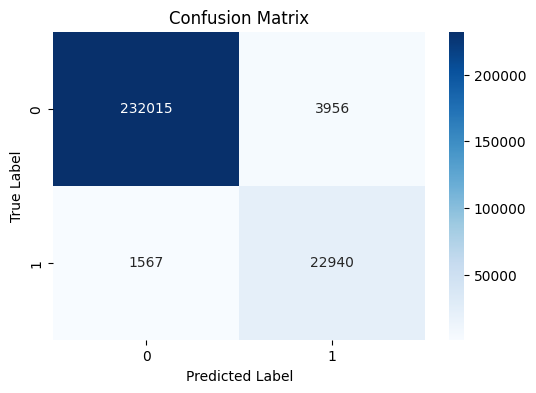

In [23]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.metrics import roc_curve, auc

In [25]:
# Predict probabilities for the test set
y_probs=grid_search.predict_proba(X_test)[:,1]# Probability estimates for the positive class

# Calculate the ROC curve
fpr,tpr,thresholds=roc_curve(y_test,y_probs)

# Calculate the AUC
roc_auc =auc(fpr,tpr)

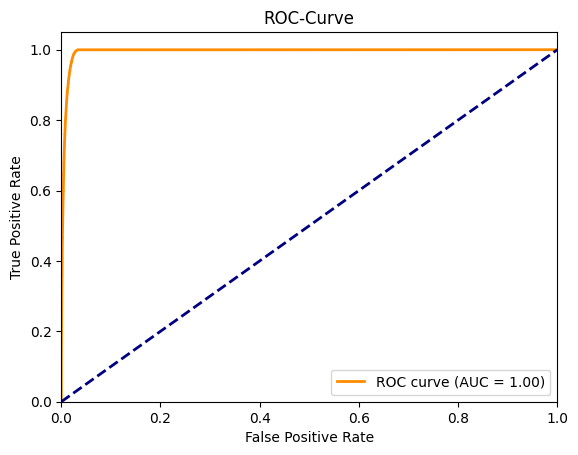

In [26]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    235971
           1       0.85      0.94      0.89     24507

    accuracy                           0.98    260478
   macro avg       0.92      0.96      0.94    260478
weighted avg       0.98      0.98      0.98    260478



In [28]:
#our aim is to increase the precision and recall scores


In [29]:
gst=pd.concat([gst_train,gst_test],axis=0)

In [30]:
X=gst.drop(columns='target')
y=gst['target']

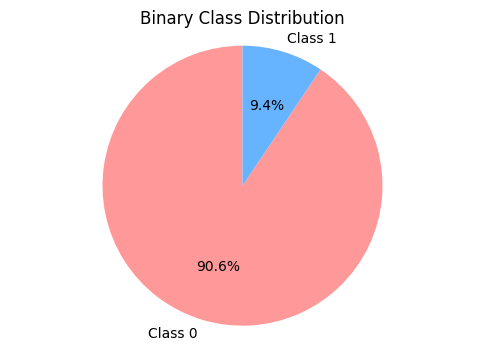

In [31]:
#plotting pie chart depicting distribution of both the classes
labels=['Class 0','Class 1']
count=gst['target'].value_counts()
sizes=count.values
plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.title('Binary Class Distribution')
plt.show()

In [32]:
print(count)

target
0    943744
1     98017
Name: count, dtype: int64


In [33]:
#Conclusion:-Data is imbalanced

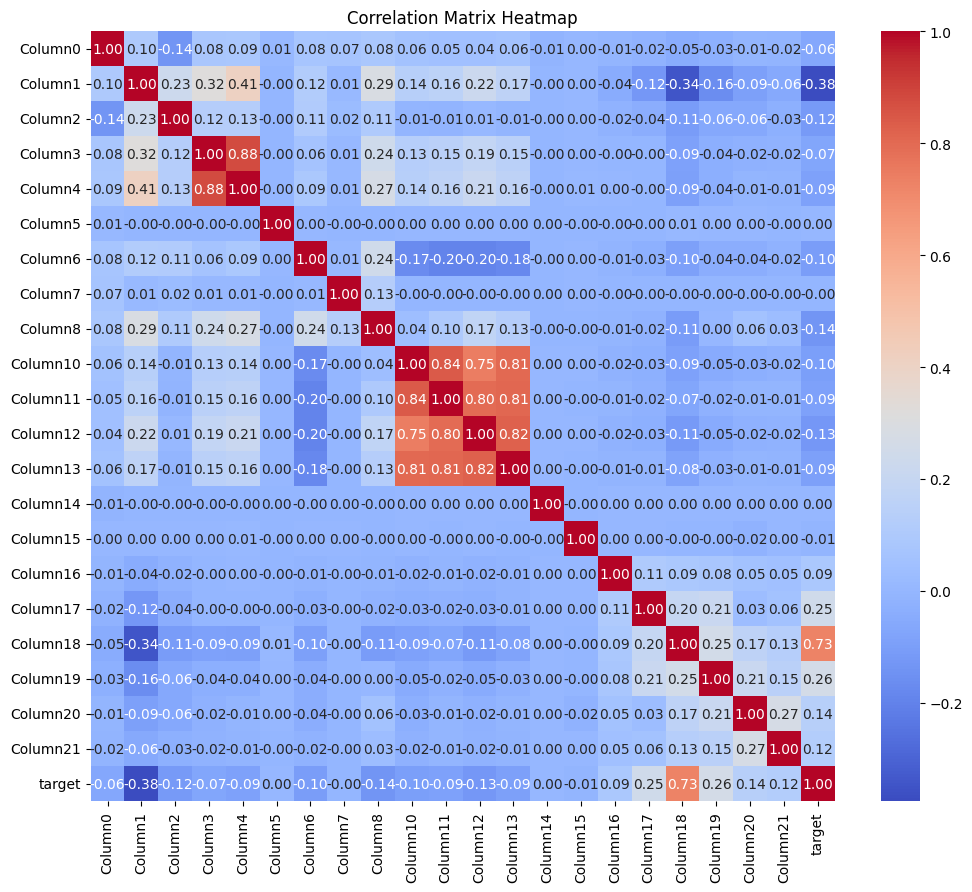

In [34]:
#correlation_matrix
corr_mat=gst.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

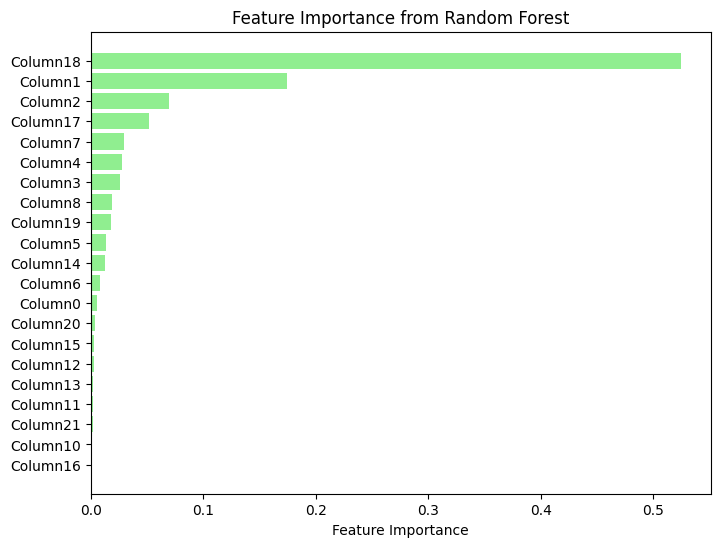

In [35]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X, y)

# Get feature importances
rf_importances = rf_clf.feature_importances_

# Plot
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [36]:

print(rf_importances)

[0.00613395 0.17417651 0.06968892 0.02650109 0.0279337  0.01349628
 0.00826537 0.03008688 0.01873455 0.00148414 0.00213896 0.00273671
 0.00221331 0.01260407 0.00299034 0.00058928 0.05201766 0.52471761
 0.01770281 0.00372308 0.00206478]


In [37]:
#we can see that columns like 16,14,10,21 is least important and also does not depend upon the target, we can remove these columns

In [38]:
gst_new=gst.drop(columns=['Column14','Column16','Column21','Column10'])

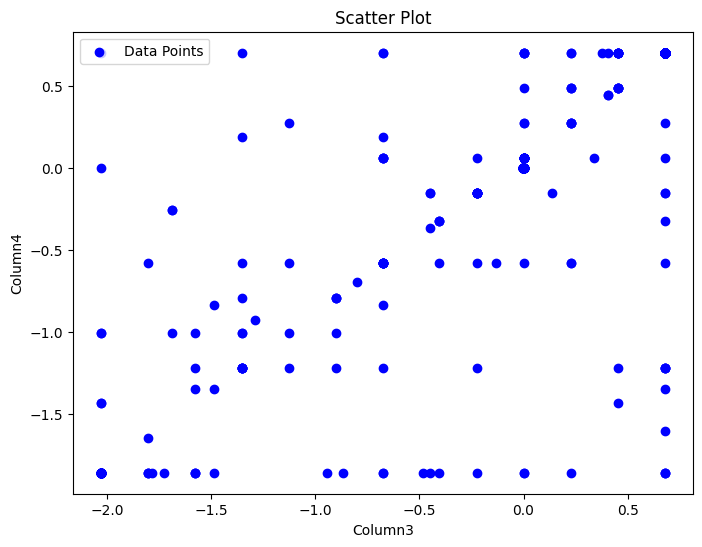

In [39]:
#also according to correlation matrix column3 and column4 are highly correlated 
# Create a scatter plot
gst_new_sample=gst_new.sample(500)
X=gst_new_sample['Column3']
y=gst_new_sample['Column4']
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.scatter(X,y, color='blue', label='Data Points', marker='o')  # Plot data

# Add labels and title
plt.xlabel('Column3')
plt.ylabel('Column4')
plt.title('Scatter Plot')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [40]:
#we will remove column3 to reduce multicollinearity
gst_new=gst_new.drop(columns='Column3')

In [41]:
gst_new.columns

Index(['Column0', 'Column1', 'Column2', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8', 'Column11', 'Column12', 'Column13', 'Column15',
       'Column17', 'Column18', 'Column19', 'Column20', 'target'],
      dtype='object')

In [42]:
X=gst_new.drop(columns='target')
y=gst_new['target']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [44]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [9],
    'n_estimators': [250],
    'learning_rate': [0.09],
    'gamma': [0.2],
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\aayuk\anaconda3\envs\py310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:09:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.09],
                         'max_depth': [9], 'n_estimators': [250]},
             scoring='roc_auc', verbose=1)

In [45]:
y_pred=grid_search.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.978824432854446


In [46]:
#we see that accuracy score remains the same after removing the columns


In [47]:
gst_new.skew()

Column0       3.920545
Column1       0.076172
Column2       0.435820
Column4      -1.100294
Column5     371.101541
Column6       2.584539
Column7     136.911395
Column8      74.943116
Column11      0.813477
Column12      0.562627
Column13      0.725287
Column15   -926.945506
Column17     36.839098
Column18      4.900903
Column19      7.098461
Column20     10.130794
target        2.780693
dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
#scaling down the values in Column5,Column7,Column15
ss=StandardScaler()

In [50]:
gst_new[['Column5','Column7','Column15']]=ss.fit_transform(gst_new[['Column5','Column7','Column15']])

In [51]:
#Column5,7,8 are highly postively skewed so we will apply log tranformation to these columns to try to achieve normal distribution ie reducing the skewness
# Log transform for positively skewed columns
gst_new['Column5'] = np.log1p(gst_new['Column5'])
gst_new['Column7'] = np.log1p(gst_new['Column7'])
gst_new['Column8'] = np.log1p(gst_new['Column8'])

In [52]:
gst_new.skew()

Column0       3.920545
Column1       0.076172
Column2       0.435820
Column4      -1.100294
Column5      66.752007
Column6       2.584539
Column7      46.445543
Column8      -0.007850
Column11      0.813477
Column12      0.562627
Column13      0.725287
Column15   -926.945506
Column17     36.839098
Column18      4.900903
Column19      7.098461
Column20     10.130794
target        2.780693
dtype: float64

In [53]:
#Column15 is negatively skewed
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
gst_new['Column15'] = pt.fit_transform(gst_new[['Column15']])

***ANOMALY DETECTION/HANDLING THE OUTLIERS***

In [54]:
X=gst_new.drop(columns='target')
y=gst_new['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
#plotting the box-plot for columns 5,7,8 to analyze outliers 

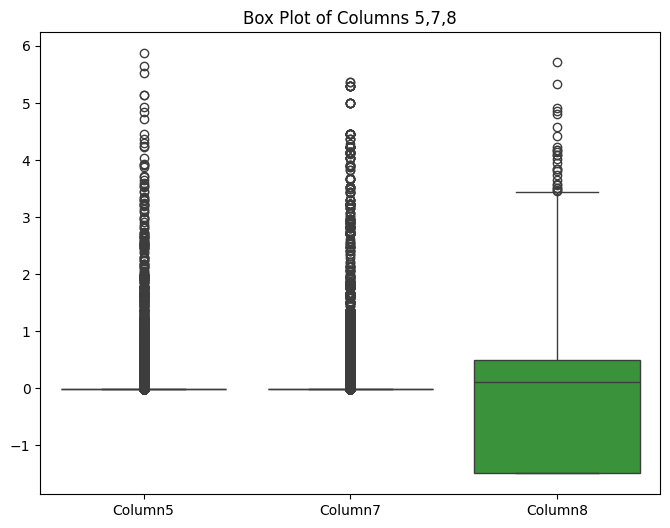

In [56]:
df=X_train[['Column5','Column7','Column8']]
plt.figure(figsize=(8,6))
sns.boxplot(data=df)

# Show the plot
plt.title("Box Plot of Columns 5,7,8")
plt.show()

In [57]:
#Large numbers of outliers is present in these columns
#since these outliers may represent valid data points so we cannot remove them instead we can cap these outliers or apply further tranformations

In [58]:
#Capping or Winsorziation 
#we are going to cap values in these columns between 5 percentile and 95 percentile
#for Column5
lower_cap=gst_new['Column5'].quantile(0.05)
upper_cap=gst_new['Column5'].quantile(0.95)
# Cap the outliers
gst_new['Column5'] = np.where(gst_new['Column5'] < lower_cap, lower_cap, gst_new['Column5'])
gst_new['Column5'] = np.where(gst_new['Column5'] > upper_cap, upper_cap, gst_new['Column5'])


In [59]:
#for column7
lower_cap=gst_new['Column7'].quantile(0.05)
upper_cap=gst_new['Column7'].quantile(0.95)
# Cap the outliers
gst_new['Column7'] = np.where(gst_new['Column7'] < lower_cap, lower_cap, gst_new['Column7'])
gst_new['Column7'] = np.where(gst_new['Column7'] > upper_cap, upper_cap, gst_new['Column7'])


In [60]:
#for Column8
lower_cap=gst_new['Column8'].quantile(0.05)
upper_cap=gst_new['Column8'].quantile(0.95)
# Cap the outliers
gst_new['Column8'] = np.where(gst_new['Column8'] < lower_cap, lower_cap, gst_new['Column8'])
gst_new['Column8'] = np.where(gst_new['Column8'] > upper_cap, upper_cap, gst_new['Column8'])


In [61]:
X=gst_new.drop(columns='target')
y=gst_new['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=16)

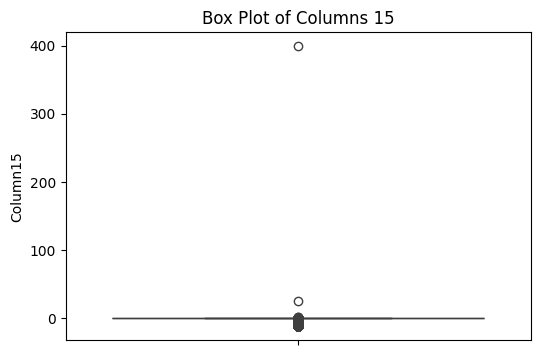

In [62]:
df=gst_new['Column15']
plt.figure(figsize=(6,4))
sns.boxplot(data=df)

# Show the plot
plt.title("Box Plot of Columns 15")
plt.show()

In [63]:
#in Column15 we can see that there are not much extreme values so we need not to cap those values 

In [64]:
#Anomaly Detection
# we check for further anomalies for class 0

from sklearn.ensemble import IsolationForest
X_class_0=gst_new[gst_new['target']==0].drop(columns='target')
iso_forest=IsolationForest(contamination=0.02)#we expect 2% of values to be anomalies
iso_forest.fit(X_class_0) 
anomalies = iso_forest.predict(X_class_0)

In [65]:
uni,cnt=np.unique(anomalies,return_counts=True)
print(cnt)

[ 18869 924875]


***MODEL TRAINING AFTER SOME DATA ANALYSIS***

In [66]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [9],
    'n_estimators': [250],
    'learning_rate': [0.09],
    'gamma': [0.2],
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\aayuk\anaconda3\envs\py310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:10:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.09],
                         'max_depth': [9], 'n_estimators': [250]},
             scoring='roc_auc', verbose=1)

In [67]:
y_pred=grid_search.predict(X_test)
accuracy_score(y_test,y_pred)

0.9789491871967286

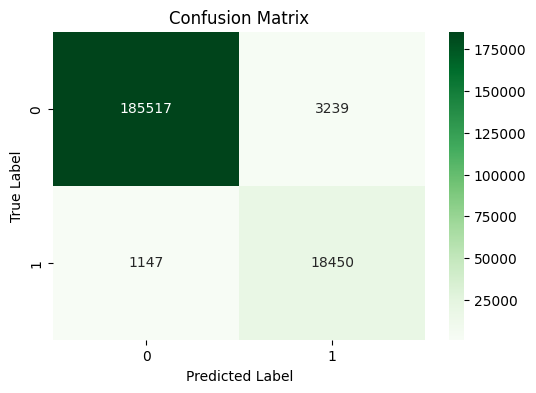

In [68]:
#plotting confusion matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [69]:
#after analysis model is somewhat performing better than the initial model

In [70]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    188756
           1       0.85      0.94      0.89     19597

    accuracy                           0.98    208353
   macro avg       0.92      0.96      0.94    208353
weighted avg       0.98      0.98      0.98    208353



***HANDLING THE IMBALANCED DATA***

In [71]:
#main aim here is to increase the precision and recall score for minority class ie 1

**To handle imbalanced data,we have tried following methods:-**

**OVERSAMPLING BY SMOTE**

In [72]:
#We will perform oversampling in our training data using SMOTE for better prediction of our model for class 1
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

In [73]:
#Now we apply PCA to this balanced dataset to reduce the dimensions/rows while retaining the variance of the dataset
from sklearn.decomposition import PCA
#first we standardize the datset
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Standardize test data using the same scaler
#now we apply pca to both the datasets
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_res_pca = pca.fit_transform(X_train_res_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA transformation to the test data


***MODEL TRAINING AFTER OVERSAMPLING AND PCA***

In [74]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [75]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [9],
    'n_estimators': [250],
    'learning_rate': [0.09],
    'gamma': [0.2],
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='precision', verbose=1, n_jobs=-1)
grid_search.fit(X_train_res_pca, y_train_resampled)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\aayuk\anaconda3\envs\py310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:15:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importan...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.09],
                         'max_depth': [9], 'n_estimators': [250]},
             scoring='precision', verbose=1)

In [76]:
y_pred=grid_search.predict(X_test_pca)
print(accuracy_score(y_test,y_pred))

0.9723834070063786


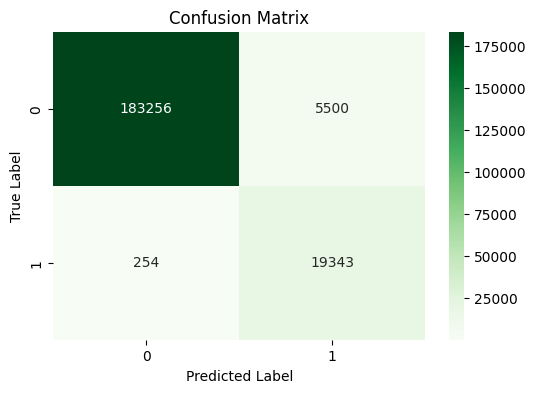

In [77]:
#plotting confusion matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [78]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    188756
           1       0.78      0.99      0.87     19597

    accuracy                           0.97    208353
   macro avg       0.89      0.98      0.93    208353
weighted avg       0.98      0.97      0.97    208353



In [79]:
# Predict probabilities for the test set
y_probs=grid_search.predict_proba(X_test_pca)[:,1]# Probability estimates for the positive class

# Calculate the ROC curve
fpr,tpr,thresholds=roc_curve(y_test,y_probs)

# Calculate the AUC
roc_auc =auc(fpr,tpr)

In [80]:
roc_auc

0.9934013048727273

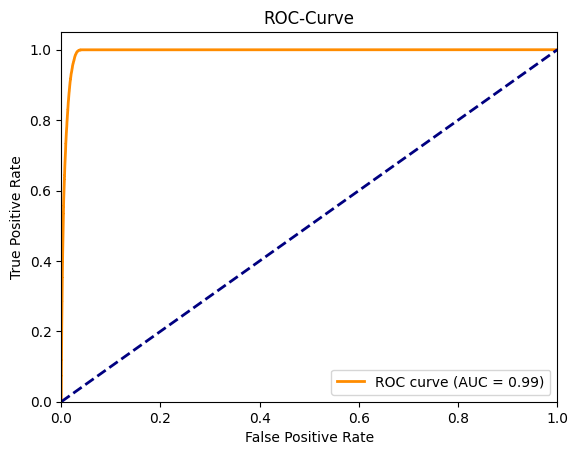

In [81]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc='lower right')
plt.show()

***MODEL TRAINING AFTER JUST OVERSAMPLING***

In [82]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [9],
    'n_estimators': [250],
    'learning_rate': [0.1],
    'gamma': [0.2],
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train_res_scaled, y_train_resampled)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\aayuk\anaconda3\envs\py310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importan...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.1],
                         'max_depth': [9], 'n_estimators': [250]},
             scoring='roc_auc', verbose=1)

In [83]:
y_pred=grid_search.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))

0.9751815428623538


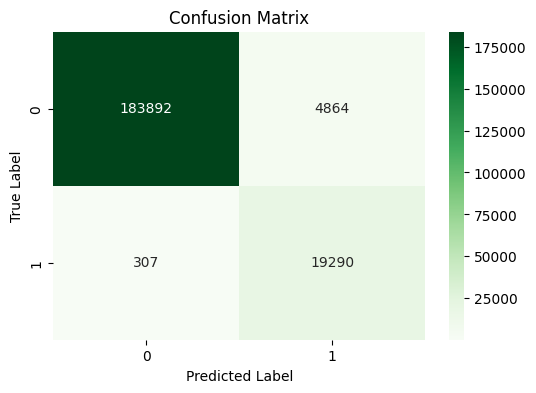

In [84]:
#plotting confusion matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [85]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    188756
           1       0.80      0.98      0.88     19597

    accuracy                           0.98    208353
   macro avg       0.90      0.98      0.93    208353
weighted avg       0.98      0.98      0.98    208353



**So we observe that the model's ability to correctly identify positive cases (class 1) has improved significantly, 
as there is increase in true positives and significant decrease in false negatives.
However, there is a trade-off, as the number of false positives has increased, 
which means the model is now incorrectly predicting more class 0 cases as class 1.**

**ADJUSTING THE CLASS WEIGHTS**

In [86]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',scale_pos_weight=2)

# Define the parameter grid
param_grid = {
    'max_depth': [9],
    'n_estimators': [250],
    'learning_rate': [0.09],
    'gamma': [0.2],
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\aayuk\anaconda3\envs\py310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:19:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importan...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.09],
                         'max_depth': [9], 'n_estimators': [250]},
             scoring='roc_auc', verbose=1)

In [87]:
y_pred=grid_search.predict(X_test)
accuracy_score(y_test,y_pred)

0.9775333208545114

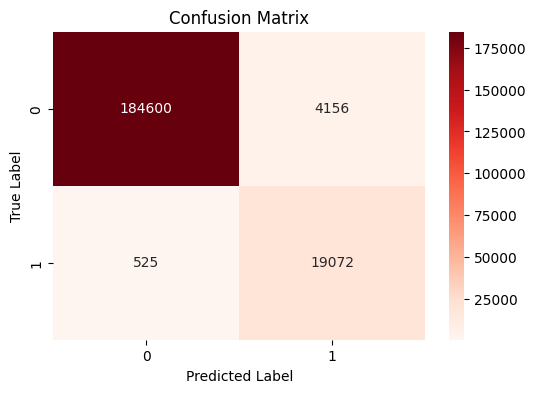

In [88]:
#plotting confusion matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [89]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    188756
           1       0.82      0.97      0.89     19597

    accuracy                           0.98    208353
   macro avg       0.91      0.98      0.94    208353
weighted avg       0.98      0.98      0.98    208353



In [90]:
# Predict probabilities for the test set
y_probs=grid_search.predict_proba(X_test)[:,1]# Probability estimates for the positive class

# Calculate the ROC curve
fpr,tpr,thresholds=roc_curve(y_test,y_probs)

# Calculate the AUC
roc_auc =auc(fpr,tpr)

In [91]:
roc_auc

0.9949536793830035

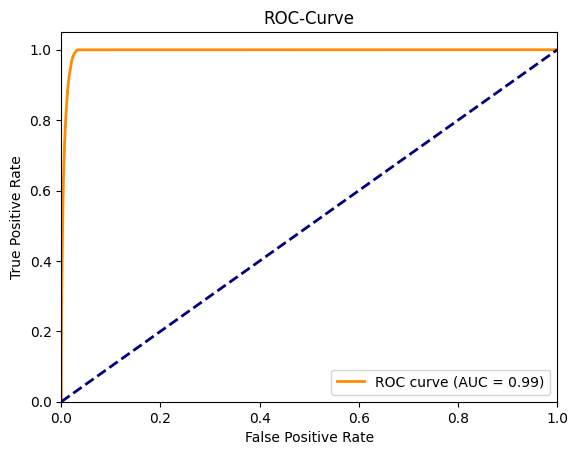

In [92]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc='lower right')
plt.show()

**So,by assigning the class weights to 1:2(class 0:class 1) ie by giving double the  priority to minority class ie class 1
,we get a better precision then oversampling and overall accuracy score**

***SEPARATE ANALYSIS ON COLUMN18***

In [94]:
gst['Column18'].value_counts()

Column18
0.0     906871
1.0     123441
2.0       8108
3.0       1943
4.0        659
5.0        326
6.0        165
7.0        107
8.0         94
9.0         36
12.0        11
Name: count, dtype: int64

In [95]:
#we observe that target column is highly dependent upon 'Column18' values
gst[gst['Column18']==0.0]['target'].value_counts()

target
0    906871
Name: count, dtype: int64

In [96]:
#we see that if there is a zero in column18 that means target is always zero
#therefore there is a deterministic relation between this column and the target
gst[~(gst['Column18']==0.0)]['target'].value_counts()

target
1    98017
0    36873
Name: count, dtype: int64

In [97]:
#we will try to train the model without this column to check how it affects the metrics
gst1=gst[~(gst['Column18']==0.0)]

In [98]:
gst1.shape

(134890, 22)

In [99]:
X=gst1.drop(columns='target')
y=gst1['target']

In [100]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.15,random_state=15)

In [101]:
#ignoring column18 with values equal to 0 we will check importance of other features
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

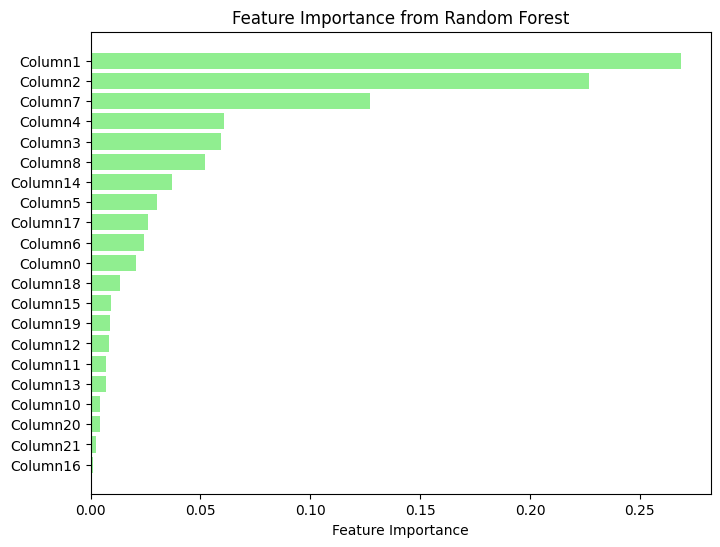

In [102]:
# Train a Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X, y)

# Get feature importances
rf_importances = rf_clf.feature_importances_

# Plot
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [103]:
print(rf_importances)

[0.02065703 0.26874191 0.2270266  0.05952023 0.06083222 0.03034107
 0.02426836 0.1272967  0.05201011 0.00433153 0.00713546 0.00833586
 0.00679992 0.0370783  0.00951012 0.00130032 0.02623764 0.01318518
 0.00873958 0.00412146 0.0025304 ]


In [104]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [105]:
#train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [9],
    'n_estimators': [250],
    'learning_rate': [0.09],
    'gamma': [0.2],
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_tr, y_tr)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\aayuk\anaconda3\envs\py310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:20:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importan...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.09],
                         'max_depth': [9], 'n_estimators': [250]},
             scoring='f1', verbose=1)

In [106]:
y_pred=grid_search.predict(X_te)

In [107]:
accuracy_score(y_te,y_pred)

0.835376099634279

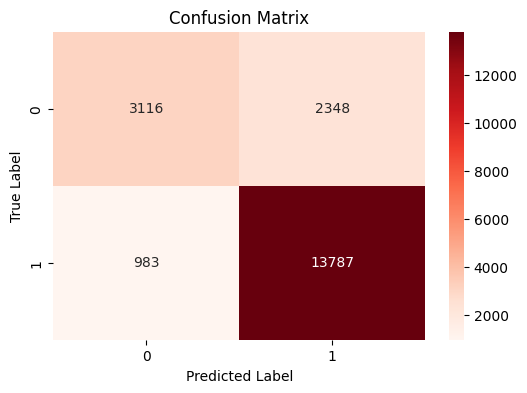

In [108]:
cm = confusion_matrix(y_te, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [109]:
gst1['target'].value_counts()

target
1    98017
0    36873
Name: count, dtype: int64

In [110]:

uni,counts=np.unique(y_tr,return_counts=True)

In [111]:

print(counts)

[31409 83247]


In [112]:


report=classification_report(y_te,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      5464
           1       0.85      0.93      0.89     14770

    accuracy                           0.84     20234
   macro avg       0.81      0.75      0.77     20234
weighted avg       0.83      0.84      0.83     20234



In [113]:
#after removing rows with zero values in column18 target 0 becomes the minority class

In [114]:
#we will increase the samples of the zero class by oversampling using SMOTE

In [115]:
from imblearn.over_sampling import SMOTE

In [116]:
smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled=smote.fit_resample(X_tr,y_tr)

In [117]:
X_train_resampled.shape

(166494, 21)

In [118]:
uni,counts=np.unique(y_train_resampled,return_counts=True)
print(counts)

[83247 83247]


In [119]:
#now we have 50% distribution of both the classes
#we will train the model on this data

In [120]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [9],
    'n_estimators': [250],
    'learning_rate': [0.09],
    'gamma': [0.2],
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


C:\Users\aayuk\anaconda3\envs\py310\lib\site-packages\xgboost\core.py:158: UserWarning: [01:20:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importan...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.09],
                         'max_depth': [9], 'n_estimators': [250]},
             scoring='f1', verbose=1)

In [121]:
y_pred=grid_search.predict(X_te)

In [122]:
accuracy_score(y_te,y_pred)

0.8139270534743501

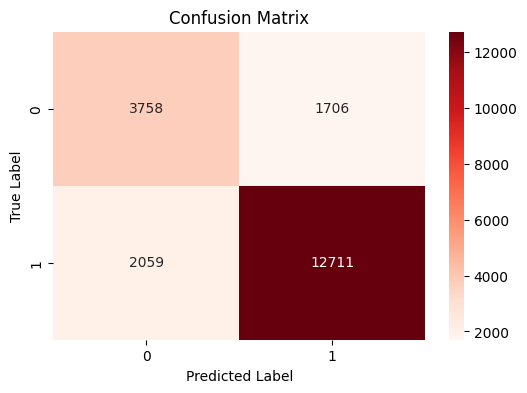

In [123]:
cm = confusion_matrix(y_te, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [124]:
#Conclusion:-since target being 0 depends strongly on 'Column18' thus we cannot remove the rows with value 0 in 'Column18'